In [ ]:
import sys
sys.path.append('../src')

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from utils import *

import seaborn as sns
sns.set()

# This training

We will be working with data generated by Python functions and using random number generators. I will refer to these data by what they _could be_. For example, we'll start with daily counts of tweets for a prolific user.

We take this approach because it allows us to set the "ground truth" behind the data. We can also see how the amount, quality, and character of the data affects its usability and our inferences.

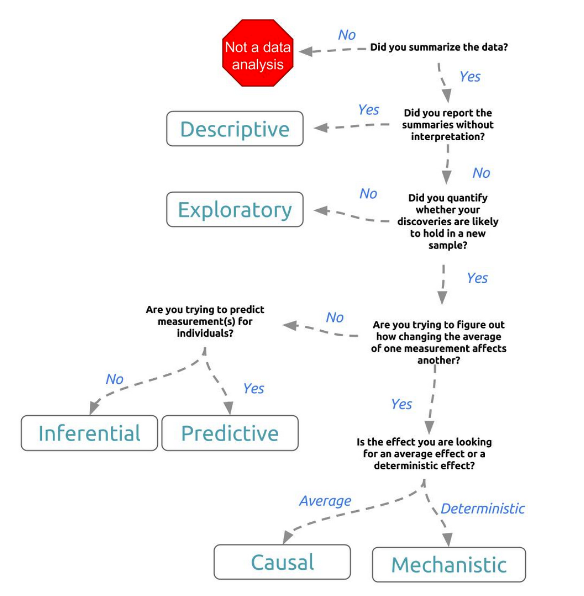
(from Leek 2015, The Elements of Data Analytic Style)

## Exploratory Data Analysis

When you would like to use data, particularly data you haven't worked with before, there are a few things you should do first. 

+ what are the values of various summary statistics (mean, variance, etc…)?
+ how is the data distributed?
+ are there outliers?
+ do some data points have null/NaN values? how might we deal with those?

In this lesson we will talk about a few different approaches to exploratory data analysis (EDA). EDA is essential for you to discover the character of your data, the relationships between variables, and the potential problems inherent in the dataset.

In [ ]:
tweet_counts = tweets_data(mean=50, seed=44)

### What is in `tweet_counts` now?

In [ ]:
# how much data are in there?
display(tweet_counts.shape)

one column of data with 1000 rows

In [ ]:
display(tweet_counts.mean())

the mean is around 50

what about some other descriptive statistics?

In [ ]:
print("Variance:")
display(tweet_counts.var())
print("Standard deviation:")
display(tweet_counts.std())
print("Square root of the variance:")
display(np.sqrt(tweet_counts.var()))

[Moments of a Distribution](https://en.wikipedia.org/wiki/Moment_(mathematics))

There are higher-order moments for the data distribution. These describe asymmetries in the shape of the data.

In [ ]:
display(tweet_counts.describe())

In [ ]:
display(stats.skew(tweet_counts))
display(stats.kurtosis(tweet_counts))

In [ ]:
plot_anscombe()

## Percentiles and the Cumulative Distribution

Notice in the call to `describe` above that beyond the count of value, their minimum, mean, standard deviation, and maximum we also obtain some percentile values. These values correspond to the points at which a certain percentage of the data falls below that value. The 50th percentile has a special name, the median. The gap between the 25th and the 75th is called the inter-quartile range (IQR).

In [ ]:
sns.boxplot(tweet_counts)

In [ ]:
sample_mean = tweet_counts.mean()
bins = np.linspace(0.5*sample_mean, 1.5*sample_mean, 25)
ax = sns.displot(
    tweet_counts, 
    bins=bins, 
    rug=True,
    color='midnightblue',
)
ax.set_axis_labels("Tweets / Day", "Number of Days with that count")
ax.fig.suptitle("Distribution of Daily Tweet Count")

## Cumulative distributions

The above histogram is a _differential_ distribution, showing the number of values falling in a bin. A _cumulative_ shows the fraction of values falling to the left/lower of the value you are looking at on the x-axis. Here's the cumulative distribution for our tweet counts data:

In [ ]:
import inspect
import IPython.display as disp
disp.Code(inspect.getsource(cumulative_d))

In [ ]:
x_c, y_c = cumulative_d(tweet_counts)
ax = sns.lineplot(x=x_c, y=y_c)

In [ ]:
import inspect
import IPython.display as disp
disp.Code(inspect.getsource(tweets_data))